In [89]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#import gdp_per_capita data to gdp_df data frame
gdp_df = (
    pd.read_csv('../data/gdp_per_capita.csv', dtype={'Country or Area':'category','Year':'int16'})
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
)

## Analyzing GDP Per Capita Data Frame

In [91]:
#first ten rows
gdp_df[:10]

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


In [92]:
#last ten rows
gdp_df[-10:]

,Country,Year,GDP_Per_Capita
7652,Zimbabwe,1999,2866.032886
7653,Zimbabwe,1998,2931.725144
7654,Zimbabwe,1997,2896.147308
7655,Zimbabwe,1996,2867.026043
7656,Zimbabwe,1995,2641.378271
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843
7661,Zimbabwe,1990,2704.757299


In [93]:
#dropping Value Footnotes column
#gdp_df = gdp_df.drop('Value Footnotes', axis=1)
#gdp_df.head()

In [94]:
#renaming columns
#gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
#gdp_df.head()

In [95]:
gdp_df.shape

(7662, 3)

In [96]:
print(gdp_df.dtypes)

Country           category
Year                 int16
GDP_Per_Capita     float64
dtype: object


In [97]:
gdp_df['Year'].describe()

count    7662.000000
mean     2006.388280
std         9.418727
min      1990.000000
25%      1998.000000
50%      2007.000000
75%      2015.000000
max      2022.000000
Name: Year, dtype: float64

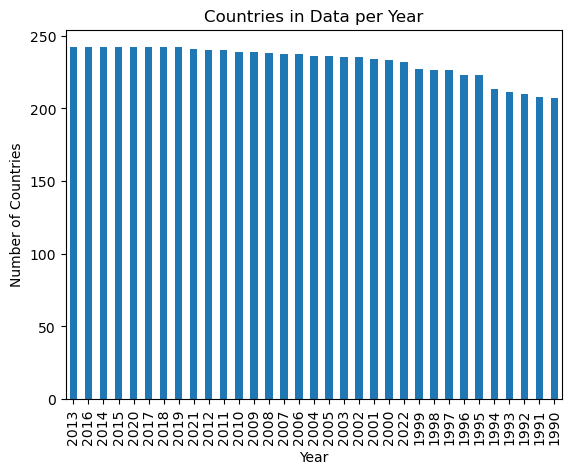

In [98]:
#gdp_df = gdp_df.sort_values(by='Year', ascending=False)
#I notice that the count generally increases with time... maybe we could plot this. 
#I wonder if this is correlated with the number of countries in the world
year_value_counts = gdp_df['Year'].value_counts()
year_value_counts.plot(kind='bar')
plt.ylabel('Number of Countries')
plt.title('Countries in Data per Year')
plt.show()

In [99]:
print(gdp_df['Country'].unique())
#May need to come back and clean this up...

['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ..., 'Viet Nam', 'West Bank and Gaza', 'World', 'Zambia', 'Zimbabwe']
Length: 242
Categories (242, object): ['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', ..., 'West Bank and Gaza', 'World', 'Zambia', 'Zimbabwe']


 ## Analyzing GDP Per Capita for 1990 and 2021

In [100]:
gdp_2021 = gdp_df[gdp_df['Year']==2021]
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


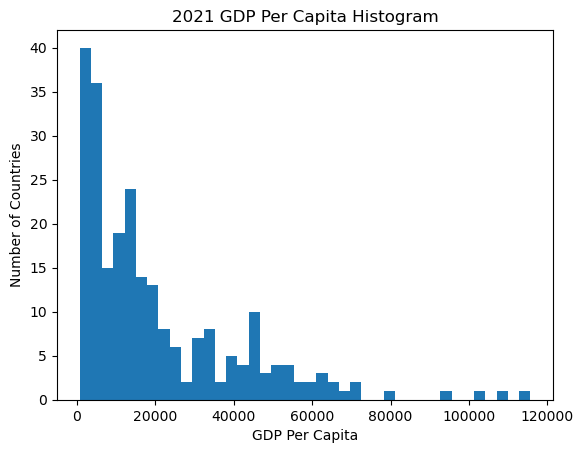

In [101]:
plt.hist(gdp_2021['GDP_Per_Capita'], bins=40)
plt.title('2021 GDP Per Capita Histogram')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')
plt.show()
#I would descibe this as a very right-skewed distribution! 
#The majority of countries have a GDP per cap < 20,000

In [102]:
#top five and bottom five countries sorted by GDP Per Capita
print(gdp_2021.sort_values('GDP_Per_Capita'))

                       Country  Year  GDP_Per_Capita
972                    Burundi  2021      714.066712
1216  Central African Republic  2021      837.504686
1629           Dem. Rep. Congo  2021     1073.643271
6272                   Somalia  2021     1136.735989
5073                     Niger  2021     1186.576809
...                        ...   ...             ...
680                    Bermuda  2021    78570.489515
5745                     Qatar  2021    92862.571798
3278                   Ireland  2021   102785.490239
6107                 Singapore  2021   107741.118436
4147                Luxembourg  2021   115683.493708

[241 rows x 3 columns]


In [103]:
#Now back to the full gdp_df, just going to look at years 1990 and 2021
gdp_df_filtered = gdp_df[gdp_df['Year'].isin([1990,2021])]
gdp_pivoted = gdp_df_filtered.pivot_table(index='Country', columns='Year', values='GDP_Per_Capita')
gdp_pivoted = gdp_pivoted.dropna()
print(gdp_pivoted)

Year                                1990          2021
Country                                               
Africa Eastern and Southern  3037.297466   3519.174840
Africa Western and Central   2788.301039   4014.607965
Albania                      4827.027705  14595.944386
Algeria                      8828.874473  11029.138782
Angola                       5793.084512   5911.835657
...                                  ...           ...
Vanuatu                      2774.138350   2800.493866
Viet Nam                     2099.394649  10628.219166
World                        9705.981267  17055.357429
Zambia                       2290.039226   3236.788981
Zimbabwe                     2704.757299   2115.144555

[206 rows x 2 columns]


C:\Users\irela\AppData\Local\Temp\ipykernel_31288\2615791224.py:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [104]:
#add percent change column to compare 1990 and 2021 GDP Per Capita
gdp_pivoted['Percent_Change'] = (100 * (gdp_pivoted[2021]-gdp_pivoted[1990])/(gdp_pivoted[1990]))
print(gdp_pivoted)

Year                                1990          2021  Percent_Change
Country                                                               
Africa Eastern and Southern  3037.297466   3519.174840       15.865334
Africa Western and Central   2788.301039   4014.607965       43.980435
Albania                      4827.027705  14595.944386      202.379544
Algeria                      8828.874473  11029.138782       24.921232
Angola                       5793.084512   5911.835657        2.049878
...                                  ...           ...             ...
Vanuatu                      2774.138350   2800.493866        0.950043
Viet Nam                     2099.394649  10628.219166      406.251608
World                        9705.981267  17055.357429       75.720074
Zambia                       2290.039226   3236.788981       41.342076
Zimbabwe                     2704.757299   2115.144555      -21.799100

[206 rows x 3 columns]


In [105]:
#How many countries experienced a negative percent change from 1990 to 2021?
gdp_pivoted_neg_change = gdp_pivoted[gdp_pivoted['Percent_Change']<0]
gdp_pivoted_neg_change['Percent_Change'].describe()
#18 countries experienced a negative percent change

count    19.000000
mean    -17.928420
std      13.029634
min     -39.236385
25%     -26.021350
50%     -18.043873
75%      -6.349968
max      -0.172662
Name: Percent_Change, dtype: float64

In [106]:
#looking for top two countries with increase in GDP Per Cap from 1990 to 2021
gdp_pivoted_pos_change=gdp_pivoted[gdp_pivoted['Percent_Change']>=0]
gdp_pivoted_pos_change = gdp_pivoted_pos_change.sort_values(by='Percent_Change', ascending=False)
print(gdp_pivoted_pos_change.iloc[:2])

Year                      1990          2021  Percent_Change
Country                                                     
Equatorial Guinea   936.419751  14637.007350     1463.081870
China              1423.896348  17657.495181     1140.082904


In [107]:
highest_percent_change_country=gdp_pivoted_pos_change.index[0]
second_highest_percent_change_country=gdp_pivoted_pos_change.index[1]
highest_pct_df = gdp_df[gdp_df['Country']==highest_percent_change_country]
second_highest_pct_df = gdp_df[gdp_df['Country']==second_highest_percent_change_country]
highest_pct_df

,Country,Year,GDP_Per_Capita
2001,Equatorial Guinea,2022,14732.917816
2002,Equatorial Guinea,2021,14637.007350
2003,Equatorial Guinea,2020,15132.379974
2004,Equatorial Guinea,2019,16240.369810
2005,Equatorial Guinea,2018,17764.969630
2006,Equatorial Guinea,2017,19617.844705
2007,Equatorial Guinea,2016,21566.057048
2008,Equatorial Guinea,2015,24563.500604
2009,Equatorial Guinea,2014,28106.198389
2010,Equatorial Guinea,2013,29143.021802


Text(0, 0.5, 'GDP Per Capita')

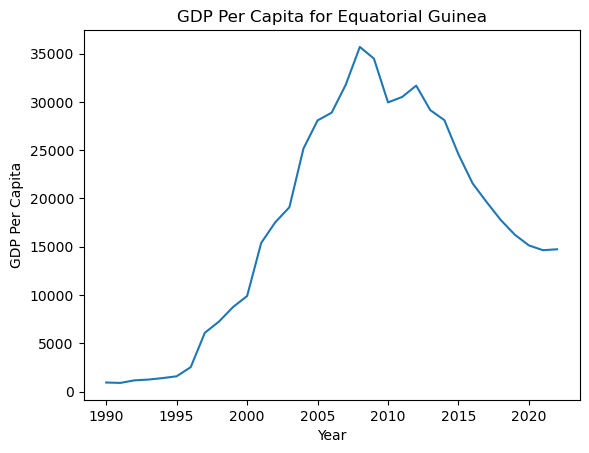

In [108]:
plt.plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'])
plt.title('GDP Per Capita for ' + highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita') #Is this in USD? How can we find out?

Text(0, 0.5, 'GDP Per Capita')

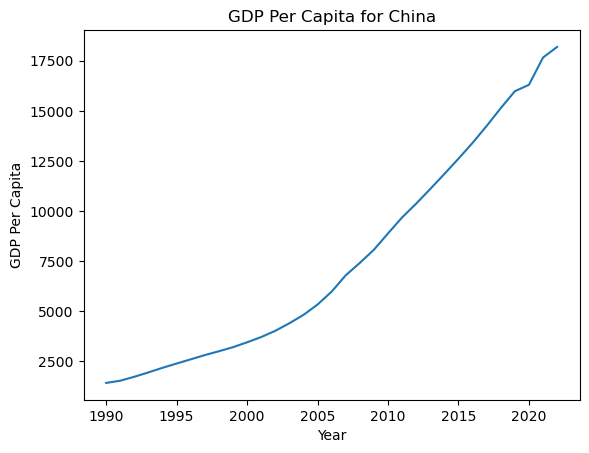

In [109]:
plt.plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'])
plt.title('GDP Per Capita for ' + second_highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

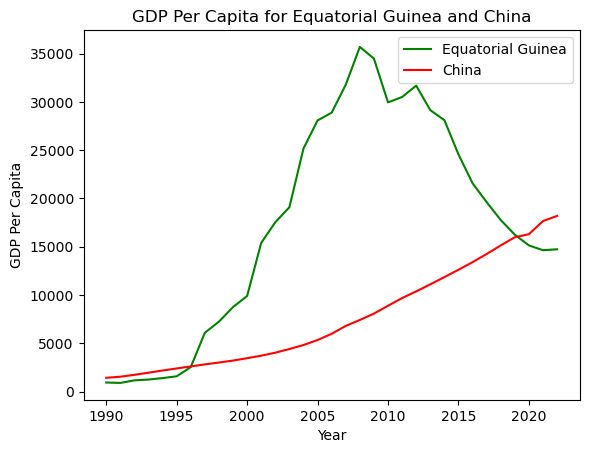

In [110]:
plt.plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'], color='Green', label=highest_percent_change_country)
plt.plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'], color='Red', label=second_highest_percent_change_country)
plt.title('GDP Per Capita for ' + highest_percent_change_country + ' and ' + second_highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend()
plt.show()

## GDP Per Capita Across Continents

In [111]:
continents = pd.read_csv('../data/continents.csv', dtype={'Continent':'category'})
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [112]:
gdp_df = pd.merge(gdp_df, continents, on='Country')
print(gdp_df)

          Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2021     1517.016266      Asia
1     Afghanistan  2020     1968.341002      Asia
2     Afghanistan  2019     2079.921861      Asia
3     Afghanistan  2018     2060.698973      Asia
4     Afghanistan  2017     2096.093111      Asia
...           ...   ...             ...       ...
5888     Zimbabwe  1994     2670.106615    Africa
5889     Zimbabwe  1993     2458.783255    Africa
5890     Zimbabwe  1992     2468.278257    Africa
5891     Zimbabwe  1991     2781.787843    Africa
5892     Zimbabwe  1990     2704.757299    Africa

[5893 rows x 4 columns]


Continent
Africa           50
Asia             41
Europe           44
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64


C:\Users\irela\AppData\Local\Temp\ipykernel_31288\1360241982.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



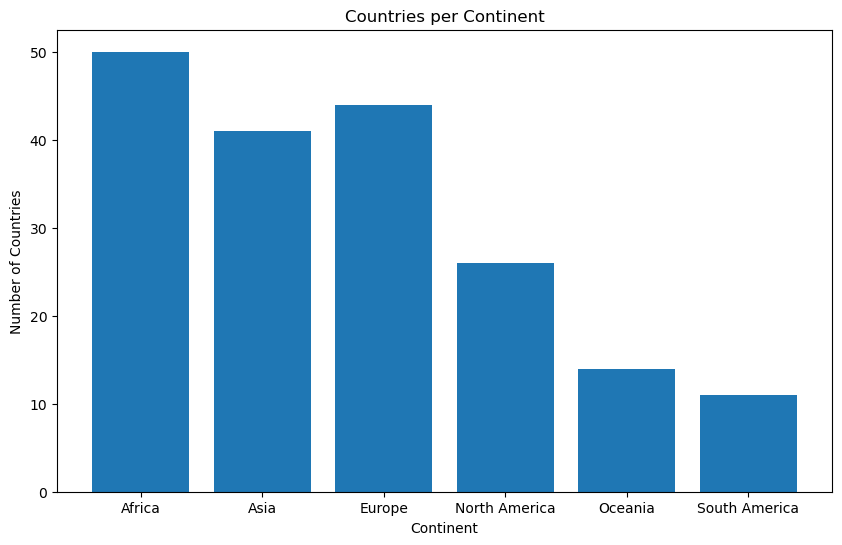

In [113]:
#The following line is not intuitive to me. Is there a better way to think about this?
unique_continent_counts = gdp_df['Country'].groupby(gdp_df['Continent']).nunique()
print(unique_continent_counts)
plt.figure(figsize=(10,6))
plt.bar(unique_continent_counts.index, unique_continent_counts.values)
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Countries per Continent')
plt.show()

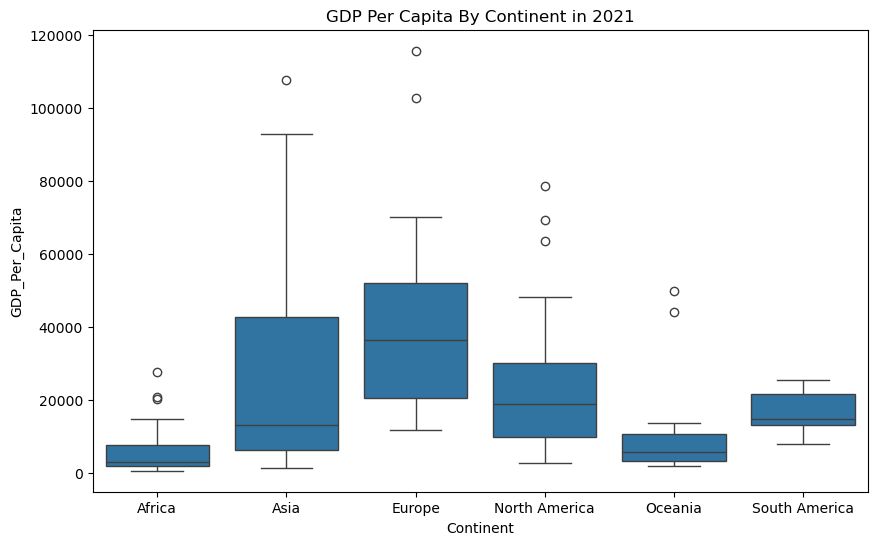

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(data=gdp_df[gdp_df['Year']==2021], x='Continent', y='GDP_Per_Capita')
plt.title('GDP Per Capita By Continent in 2021')
plt.show()

## Life Expectancy Data

In [115]:
#Now we read in the life expectancy data
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows=4) #first four rows don't have anything we care about
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


In [116]:
#cleaning up life expectancy data frame to fit our other data frames
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code','Indicator Name','Indicator Code'])
    .melt(id_vars='Country Name')
    .rename(columns={'Country Name':'Country','variable':'Year', 'value':'Life_Expectancy'})
    .dropna() #Dropping all missing values for Life_Expectancy.
)
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16753,Kosovo,2022,79.524000
16754,"Yemen, Rep.",2022,63.720000
16755,South Africa,2022,61.480000
16756,Zambia,2022,61.803000


In [117]:
#First country with life expectancy > 80?
ovr80 = life_expectancy[life_expectancy['Life_Expectancy']>80]
ovr80 = ovr80.sort_values('Year')
print(ovr80['Country'].iloc[0] + ' was the first country to exceed a life expectancy of 80 in ' + ovr80['Year'].iloc[0] + '!')

Japan was the first country to exceed a life expectancy of 80 in 1996!


In [118]:
#merging gdp_df and life_expectancy data frames
life_expectancy['Year'] = life_expectancy['Year'].astype(int) #convert year object to int
gdp_le = pd.merge(gdp_df, life_expectancy, on=['Country', 'Year'])
gdp_le = gdp_le.sort_values(['Country','Year'])
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
19,Afghanistan,2002,1280.463171,Asia,56.454
18,Afghanistan,2003,1292.333437,Asia,57.344
17,Afghanistan,2004,1260.060581,Asia,57.944
16,Afghanistan,2005,1352.320627,Asia,58.361
15,Afghanistan,2006,1366.993146,Asia,58.684
...,...,...,...,...,...
5475,Zimbabwe,2018,2399.621551,Africa,61.414
5474,Zimbabwe,2019,2203.396810,Africa,61.292
5473,Zimbabwe,2020,1990.319419,Africa,61.124
5472,Zimbabwe,2021,2115.144555,Africa,59.253


In [119]:
#Just looking at 2021
gdp_le_2021=gdp_le[gdp_le['Year']==2021]
gdp_le_2021_grth80 = gdp_le_2021[gdp_le_2021['Life_Expectancy']>80]
gdp_le_2021_grth80.describe()
#31 countries have a life exp greater than 80 in 2021

,Year,GDP_Per_Capita,Life_Expectancy
count,31.0,31.000000,31.000000
mean,2021.0,54979.098284,82.304566
std,0.0,20645.577965,1.350073
min,2021.0,29548.038910,80.082927
25%,2021.0,42232.509225,81.343902
50%,2021.0,49774.340702,82.324390
75%,2021.0,59000.049986,83.128049
max,2021.0,115683.493708,85.532683


In [120]:
#finding the top three highest GDP Per Capita countries
gdp_le_2021=gdp_le_2021.sort_values('GDP_Per_Capita', ascending=False)
print(gdp_le_2021[:10])
fir_highest_GDP_2021=gdp_le_2021['Country'].iloc[0]
sec_highest_GDP_2021=gdp_le_2021['Country'].iloc[1]
thd_highest_GDP_2021=gdp_le_2021['Country'].iloc[2]
top_three_highest_gdp_2021_countries = [fir_highest_GDP_2021, sec_highest_GDP_2021, thd_highest_GDP_2021]

                   Country  Year  GDP_Per_Capita      Continent  \
2857            Luxembourg  2021   115683.493708         Europe   
4364             Singapore  2021   107741.118436           Asia   
2285               Ireland  2021   102785.490239         Europe   
4082                 Qatar  2021    92862.571798           Asia   
581                Bermuda  2021    78570.489515  North America   
4796           Switzerland  2021    70097.368753         Europe   
5212  United Arab Emirates  2021    69733.793774           Asia   
1001        Cayman Islands  2021    69400.666661  North America   
3717                Norway  2021    65909.003030         Europe   
2890      Macao SAR, China  2021    64796.995137           Asia   

      Life_Expectancy  
2857        82.597561  
4364        83.092683  
2285        82.353659  
4082        79.272000  
581         79.280000  
4796        83.751220  
5212        78.710000  
1001        82.009756  
3717        83.163415  
2890        85.399000 

In [121]:
top_three = gdp_le[gdp_le['Country'].isin(top_three_highest_gdp_2021_countries)]
print(top_three)

        Country  Year  GDP_Per_Capita Continent  Life_Expectancy
2316    Ireland  1990    26781.627609    Europe        74.846073
2315    Ireland  1991    27141.920541    Europe        75.025000
2314    Ireland  1992    27858.632081    Europe        75.415098
2313    Ireland  1993    28466.114894    Europe        75.292195
2312    Ireland  1994    29986.140304    Europe        75.787122
...         ...   ...             ...       ...              ...
4367  Singapore  2018    98280.042373      Asia        83.297561
4366  Singapore  2019    98455.328233      Asia        83.595122
4365  Singapore  2020    94910.101431      Asia        83.543902
4364  Singapore  2021   107741.118436      Asia        83.092683
4363  Singapore  2022   108036.110993      Asia        82.895122

[99 rows x 5 columns]


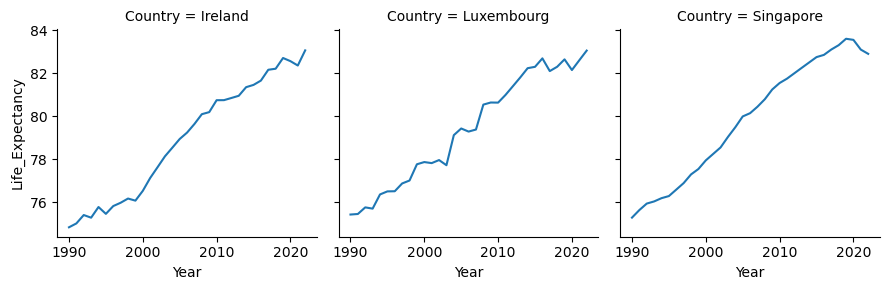

In [122]:
top_three_graph = sns.FacetGrid(top_three, col='Country')
top_three_graph.map(sns.lineplot, "Year", 'Life_Expectancy')
plt.show()

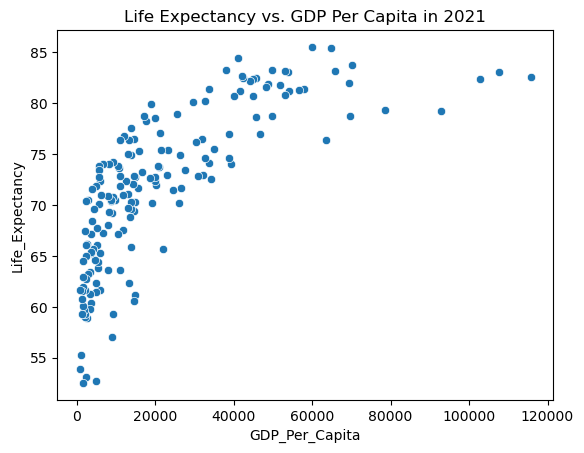

In [123]:
sns.scatterplot(data=gdp_le_2021, x='GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. GDP Per Capita in 2021')
plt.show()

In [124]:
corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['GDP_Per_Capita'])
print('2021 GDP per capita and life expectancy correlation = ' + str(corr_le_gdp_2021))

2021 GDP per capita and life expectancy correlation = 0.7450812403297987


2021 GDP per capita (log scale) and life expectancy correlation = 0.846574979726186


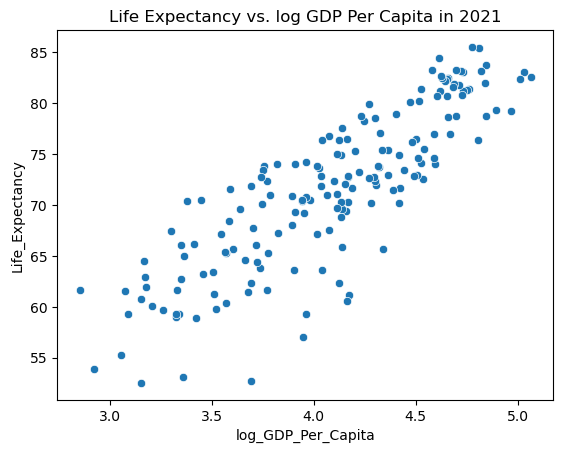

In [125]:
#log scale
gdp_le_2021['log_GDP_Per_Capita'] = gdp_le_2021['GDP_Per_Capita'].apply(np.log10)
log_corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['log_GDP_Per_Capita'])
print('2021 GDP per capita (log scale) and life expectancy correlation = ' + str(log_corr_le_gdp_2021))
sns.scatterplot(data=gdp_le_2021, x='log_GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. log GDP Per Capita in 2021')
plt.show()

In [126]:
gdp_le_grouped_by_year_and_continent = gdp_le.groupby(['Year','Continent'])
gdp_le_grouped_by_year_and_continent_median = gdp_le_grouped_by_year_and_continent['Life_Expectancy'].agg('median')
print(gdp_le_grouped_by_year_and_continent_median)
print(type(gdp_le_grouped_by_year_and_continent_median)) #it's a series!

Year  Continent    
1990  Africa           52.496500
      Asia             66.957000
      Europe           74.846073
      North America    70.713500
      Oceania          65.508000
                         ...    
2022  Asia             74.075000
      Europe           80.080293
      North America    74.615000
      Oceania          68.312000
      South America    73.425000
Name: Life_Expectancy, Length: 198, dtype: float64
<class 'pandas.core.series.Series'>


C:\Users\irela\AppData\Local\Temp\ipykernel_31288\2372066609.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [127]:
print(gdp_le_grouped_by_year_and_continent_median.index) #the index looks like a tuple!

MultiIndex([(1990,        'Africa'),
            (1990,          'Asia'),
            (1990,        'Europe'),
            (1990, 'North America'),
            (1990,       'Oceania'),
            (1990, 'South America'),
            (1991,        'Africa'),
            (1991,          'Asia'),
            (1991,        'Europe'),
            (1991, 'North America'),
            ...
            (2021,        'Europe'),
            (2021, 'North America'),
            (2021,       'Oceania'),
            (2021, 'South America'),
            (2022,        'Africa'),
            (2022,          'Asia'),
            (2022,        'Europe'),
            (2022, 'North America'),
            (2022,       'Oceania'),
            (2022, 'South America')],
           names=['Year', 'Continent'], length=198)


In [128]:
gdp_le_grouped_by_year_and_continent_median.loc[2010, 'Asia']

71.879

In [129]:
gdp_le_grouped_by_year_and_continent_median.loc[2010, ['Asia','Africa']]

Year  Continent
2010  Asia         71.879
      Africa       58.365
Name: Life_Expectancy, dtype: float64

In [130]:
gdp_le_grouped_by_year_and_continent_median.loc[2010]

Continent
Africa           58.365000
Asia             71.879000
Europe           78.481415
North America    74.190000
Oceania          68.030000
South America    73.711000
Name: Life_Expectancy, dtype: float64

In [131]:
gdp_le_grouped_by_year_and_continent_median.loc[:, 'Asia']

Year
1990    66.957000
1991    67.884500
1992    68.102439
1993    67.367341
1994    67.942000
1995    68.223000
1996    68.702000
1997    69.225000
1998    69.572000
1999    70.088000
2000    70.355000
2001    69.887000
2002    70.375000
2003    70.488500
2004    69.095329
2005    71.153500
2006    71.098500
2007    71.266000
2008    71.146500
2009    69.910000
2010    71.879000
2011    72.015500
2012    72.173500
2013    72.432000
2014    72.031000
2015    73.188000
2016    73.482000
2017    73.891500
2018    73.971500
2019    74.210500
2020    73.272000
2021    72.541000
2022    74.075000
Name: Life_Expectancy, dtype: float64

In [132]:
gdp_le_grouped_stats = gdp_le_grouped_by_year_and_continent[['GDP_Per_Capita','Life_Expectancy']].agg(['min','median','max'])
gdp_le_grouped_stats

GDP_Per_Capita                               \
                              min        median            max   
Year Continent                                                   
1990 Africa            460.123697   2199.799280   17559.006114   
     Asia              581.613311   5507.061391  105893.626059   
     Europe           4827.027705  26781.627609   70860.819124   
     North America    3409.794251   9788.684598   65961.406278   
     Oceania          2045.272278   3426.440476   31006.100227   
...                           ...           ...            ...   
2022 Asia             4001.699955  12304.948125  108036.110993   
     Europe          10731.440430  37312.101564  115541.774828   
     North America    2799.112561  15106.775175   81165.650944   
     Oceania          2002.718218   5116.335518   50997.546433   
     South America    8201.183799  15093.465117   34420.067505   

                   Life_Expectancy                        
                               min     median        max  
Year Continent                                            
1990 Africa              41.852000  52.496500  70.110000  
     Asia                53.713000  66.957000  78.837073  
     Europe              62.352000  74.846073  77.536829  
     North America       52.975000  70.713500  77.436585  
     Oceania             59.721000  65.508000  76.994634  
...                            ...        ...        ...  
2022 Asia                66.431000  74.075000  85.377000  
     Europe              68.587927  80.080293  83.453659  
     North America       63.728000  74.615000  81.571000  
     Oceania             64.014000  68.312000  83.200000  
     South America       64.928000  73.425000  79.519000  

[198 rows x 6 columns]

In [133]:
#selecting the median GDP Per Capita for Asia in 2010
gdp_le_grouped_stats.loc[(2010, 'Asia'),('GDP_Per_Capita','median')]

8602.903815568548

In [134]:
gdp_median_per_year = gdp_le_grouped_stats.loc[:,('GDP_Per_Capita','median')]
print(gdp_median_per_year)

Year  Continent    
1990  Africa            2199.799280
      Asia              5507.061391
      Europe           26781.627609
      North America     9788.684598
      Oceania           3426.440476
                           ...     
2022  Asia             12304.948125
      Europe           37312.101564
      North America    15106.775175
      Oceania           5116.335518
      South America    15093.465117
Name: (GDP_Per_Capita, median), Length: 198, dtype: float64


In [135]:
gdp_median_per_year = gdp_median_per_year.reset_index('Continent')
print(gdp_median_per_year.head(10))

          Continent GDP_Per_Capita
                            median
Year                              
1990         Africa    2199.799280
1990           Asia    5507.061391
1990         Europe   26781.627609
1990  North America    9788.684598
1990        Oceania    3426.440476
1990  South America    8818.629371
1991         Africa    2182.617129
1991           Asia    4707.072490
1991         Europe   25955.788396
1991  North America    9887.835044


In [136]:
gdp_median_per_year['Previous_Year']=gdp_median_per_year[('GDP_Per_Capita','median')].shift(periods=6)
gdp_median_per_year['Change_in_GDP_Per_Capita']=gdp_median_per_year[('GDP_Per_Capita','median')]-gdp_median_per_year['Previous_Year']
print(gdp_median_per_year.head(10))

          Continent GDP_Per_Capita Previous_Year Change_in_GDP_Per_Capita
                            median                                       
Year                                                                     
1990         Africa    2199.799280           NaN                      NaN
1990           Asia    5507.061391           NaN                      NaN
1990         Europe   26781.627609           NaN                      NaN
1990  North America    9788.684598           NaN                      NaN
1990        Oceania    3426.440476           NaN                      NaN
1990  South America    8818.629371           NaN                      NaN
1991         Africa    2182.617129   2199.799280               -17.182152
1991           Asia    4707.072490   5507.061391              -799.988901
1991         Europe   25955.788396  26781.627609              -825.839214
1991  North America    9887.835044   9788.684598                99.150446


In [137]:
gdp_median_per_year_neg = gdp_median_per_year[gdp_median_per_year['Change_in_GDP_Per_Capita']<0]
print(gdp_median_per_year_neg.size)
#Median GDP_Per_Capita dropped 188 times

188


In [138]:
gdp_le_grouped_by_year = gdp_le
gdp_le_grouped_by_year['Change_in_GDP_Per_Capita'] = gdp_le_grouped_by_year['GDP_Per_Capita'] - gdp_le_grouped_by_year.groupby('Country')['GDP_Per_Capita'].shift(periods=1)
print(gdp_le_grouped_by_year.iloc[15:25])

        Country  Year  GDP_Per_Capita Continent  Life_Expectancy  \
4   Afghanistan  2017     2096.093111      Asia           63.016   
3   Afghanistan  2018     2060.698973      Asia           63.081   
2   Afghanistan  2019     2079.921861      Asia           63.565   
1   Afghanistan  2020     1968.341002      Asia           62.575   
0   Afghanistan  2021     1517.016266      Asia           61.982   
52      Albania  1990     4827.027705    Europe           73.144   
51      Albania  1991     3496.369626    Europe           73.378   
50      Albania  1992     3264.820757    Europe           73.715   
49      Albania  1993     3598.810267    Europe           73.939   
48      Albania  1994     3921.614970    Europe           74.131   

    Change_in_GDP_Per_Capita  
4                  -5.329076  
3                 -35.394138  
2                  19.222888  
1                -111.580859  
0                -451.324735  
52                       NaN  
51              -1330.658079  
50 

In [139]:
country_sorted_by_one_year_gdp_increase = (
    gdp_le_grouped_by_year
    .sort_values('Change_in_GDP_Per_Capita', ascending=False)
    .dropna()
)
greatest_gdp_increase = country_sorted_by_one_year_gdp_increase['Country'].iloc[0]
greatest_gdp_drop = country_sorted_by_one_year_gdp_increase['Country'].iloc[-1]
print('Country with greatest GDP Per Capita increase is ' + greatest_gdp_increase)
print('Country with greatest GDP Per Capita drop is ' + greatest_gdp_drop)

Country with greatest GDP Per Capita increase is Macao SAR, China
Country with greatest GDP Per Capita drop is Macao SAR, China


C:\Users\irela\AppData\Local\Temp\ipykernel_31288\1795693126.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



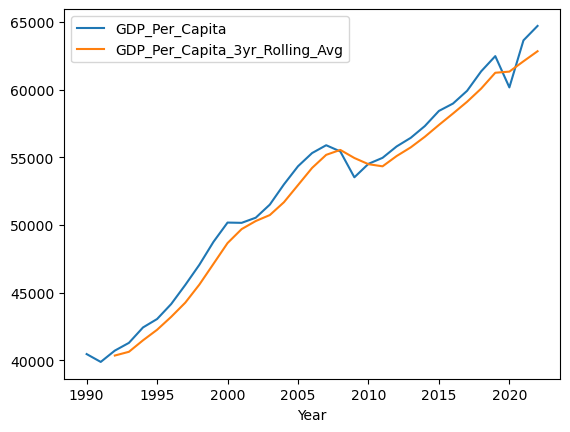

In [140]:
gdp_le_us = gdp_le[gdp_le['Country']=='United States']
gdp_le_us['GDP_Per_Capita_3yr_Rolling_Avg'] = gdp_le_us['GDP_Per_Capita'].rolling(3).mean()
gdp_le_us.plot(x='Year', y=['GDP_Per_Capita','GDP_Per_Capita_3yr_Rolling_Avg'], kind='line')
plt.show()

In [141]:
gdp_le['Continent_Category'] = gdp_le['Continent'].astype('category')
gdp_le['Year_int16'] = gdp_le['Year'].astype('int16')
gdp_le.memory_usage()

Index                       44032
Country                     44032
Year                        11008
GDP_Per_Capita              44032
Continent                    5724
Life_Expectancy             44032
Change_in_GDP_Per_Capita    44032
Continent_Category           5724
Year_int16                  11008
dtype: int64

In [142]:
%%timeit magic

gdp_le.groupby('Continent')['GDP_Per_Capita'].agg('median')

<magic-timeit>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



375 μs ± 36.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [143]:
%%timeit magic

gdp_le.groupby('Continent_Category')['GDP_Per_Capita'].agg('median')

<magic-timeit>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



293 μs ± 25.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

## Exploring plotly

In [144]:
import plotly.express as px
population = pd.read_csv('../data/population.csv')
population = population.rename(columns={'Country or Area': 'Country', 'Year(s)':'Year', 'Value':'Population', 'Variant':'Pop_Variant'})
gdp_le_pop = pd.merge(gdp_le, population, on=['Country','Year'], how='outer')
gdp_le_pop_med = gdp_le_pop[gdp_le_pop['Pop_Variant']=='Medium']
gdp_le_pop_med = gdp_le_pop_med.sort_values('Year')
fig = px.scatter(gdp_le_pop_med.query("Year==2021"), x="GDP_Per_Capita", y="Life_Expectancy", size="Population", color="Continent",
           hover_name="Country", log_x=True, size_max=50)
fig.show()


In [145]:
fig2 = px.scatter(gdp_le_pop_med, x="GDP_Per_Capita", y="Life_Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Continent", hover_name="Country", facet_col="Continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90], width = 600, height=400)
fig2.show()

## Exploring Homicide Data

In [146]:
homicide_df = pd.read_excel('../data/Homicide_Data.xls',skiprows=1)
print(homicide_df.columns)
homicide_df = (
    homicide_df
    .drop(columns=['Source','Region','Subregion'])
)

Index([   'Region', 'Subregion',   'Country',    'Source',        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,        2014,        2015,
              2016,        2017,        2018,        2019,        2020,
              2021,    '2000.1',    '2001.1',    '2002.1',    '2003.1',
          '2004.1',    '2005.1',    '2006.1',    '2007.1',    '2008.1',
          '2009.1',    '2010.1',    '2011.1',    '2012.1',    '2013.1',
          '2014.1',    '2015.1',    '2016.1',    '2017.1',    '2018.1',
          '2019.1',    '2020.1',    '2021.1'],
      dtype='object')


In [147]:
homicide_df_melted_number = pd.melt(homicide_df, id_vars='Country', 
                      value_vars=[Year for Year in range(2000,2022)], 
                      var_name='Year', value_name='Number_of_Victims')
homicide_df_melted_rate = pd.melt(homicide_df, id_vars='Country', 
                      value_vars=[f'{Year}.1' for Year in range(2000,2022)], 
                      var_name='Year', value_name='Homicide_Rate_Per_100k')
homicide_df_melted_rate['Year'] = homicide_df_melted_rate['Year'].str.replace('.1','', regex=False)
homicide_df_melted_rate['Year'] = homicide_df_melted_rate['Year'].astype(int)
homicide_df_melted_number = homicide_df_melted_number.dropna()
homicide_df_melted_rate = homicide_df_melted_rate.dropna()

In [148]:
homicide_df = pd.merge(homicide_df_melted_number, homicide_df_melted_rate, on=['Country','Year'], how='outer')
#print(homicide_df_melted_number)
#print(homicide_df_melted_rate)
#print(homicide_df[homicide_df['Country']=='Nepal'])
gdp_le_hom = pd.merge(homicide_df, gdp_le, on=['Country','Year'])
print(gdp_le_hom.sample(10))

                 Country  Year  Number_of_Victims  Homicide_Rate_Per_100k  \
1188               Japan  2012             1102.0                1.204493   
1233               Kenya  2005             1083.6                3.023184   
1973        Saudi Arabia  2005              297.0                1.217331   
335              Bermuda  2018                9.0               14.157399   
1743            Pakistan  2006            10048.0                5.642725   
1480              Mexico  2020           250505.0              682.885427   
667   Dominican Republic  2005             5098.0               81.148842   
527                China  2012            22857.0                1.672593   
1986              Serbia  2007              737.0               24.970674   
2412            Zimbabwe  2020             1656.0               16.245821   

      GDP_Per_Capita      Continent  Life_Expectancy  \
1188    38735.896349           Asia        83.096098   
1233     3399.403994         Africa     

-0.2886125647097514


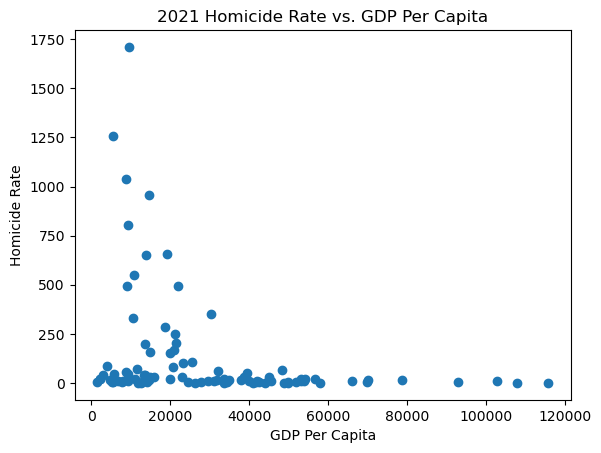

In [149]:
gdp_le_hom_2021 = gdp_le_hom[gdp_le_hom['Year']==2021]
gdp_hom_rate_2021_corr = gdp_le_hom_2021['GDP_Per_Capita'].corr(gdp_le_hom_2021['Homicide_Rate_Per_100k'])
print(gdp_hom_rate_2021_corr)
plt.scatter(gdp_le_hom_2021['GDP_Per_Capita'], gdp_le_hom_2021['Homicide_Rate_Per_100k'])
plt.title('2021 Homicide Rate vs. GDP Per Capita')
plt.ylabel('Homicide Rate')
plt.xlabel('GDP Per Capita')
plt.show()

-0.25725575792338284


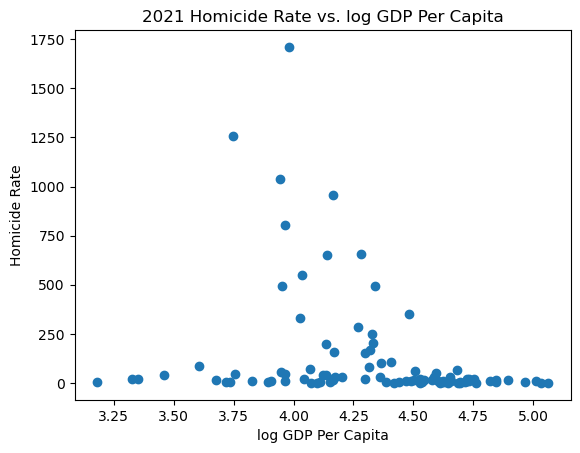

In [150]:
#log scale
gdp_le_hom['log_GDP_Per_Capita']=gdp_le_hom['GDP_Per_Capita'].apply(np.log10)
gdp_le_hom_2021 = gdp_le_hom[gdp_le_hom['Year']==2021]
log_gdp_hom_rate_2021_corr = gdp_le_hom_2021['log_GDP_Per_Capita'].corr(gdp_le_hom_2021['Homicide_Rate_Per_100k'])
print(log_gdp_hom_rate_2021_corr)
plt.scatter(gdp_le_hom_2021['log_GDP_Per_Capita'], gdp_le_hom_2021['Homicide_Rate_Per_100k'])
plt.title('2021 Homicide Rate vs. log GDP Per Capita')
plt.ylabel('Homicide Rate')
plt.xlabel('log GDP Per Capita')
plt.show()

-0.17496485176205248


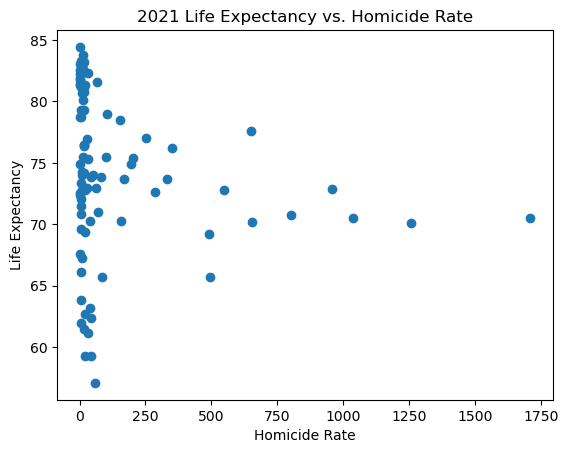

In [151]:
le_hom_corr_2021 = gdp_le_hom_2021['Life_Expectancy'].corr(gdp_le_hom_2021['Homicide_Rate_Per_100k'])
print(le_hom_corr_2021)
plt.scatter(gdp_le_hom_2021['Homicide_Rate_Per_100k'], gdp_le_hom_2021['Life_Expectancy'])
plt.title('2021 Life Expectancy vs. Homicide Rate')
plt.ylabel('Life Expectancy')
plt.xlabel('Homicide Rate')
plt.show()